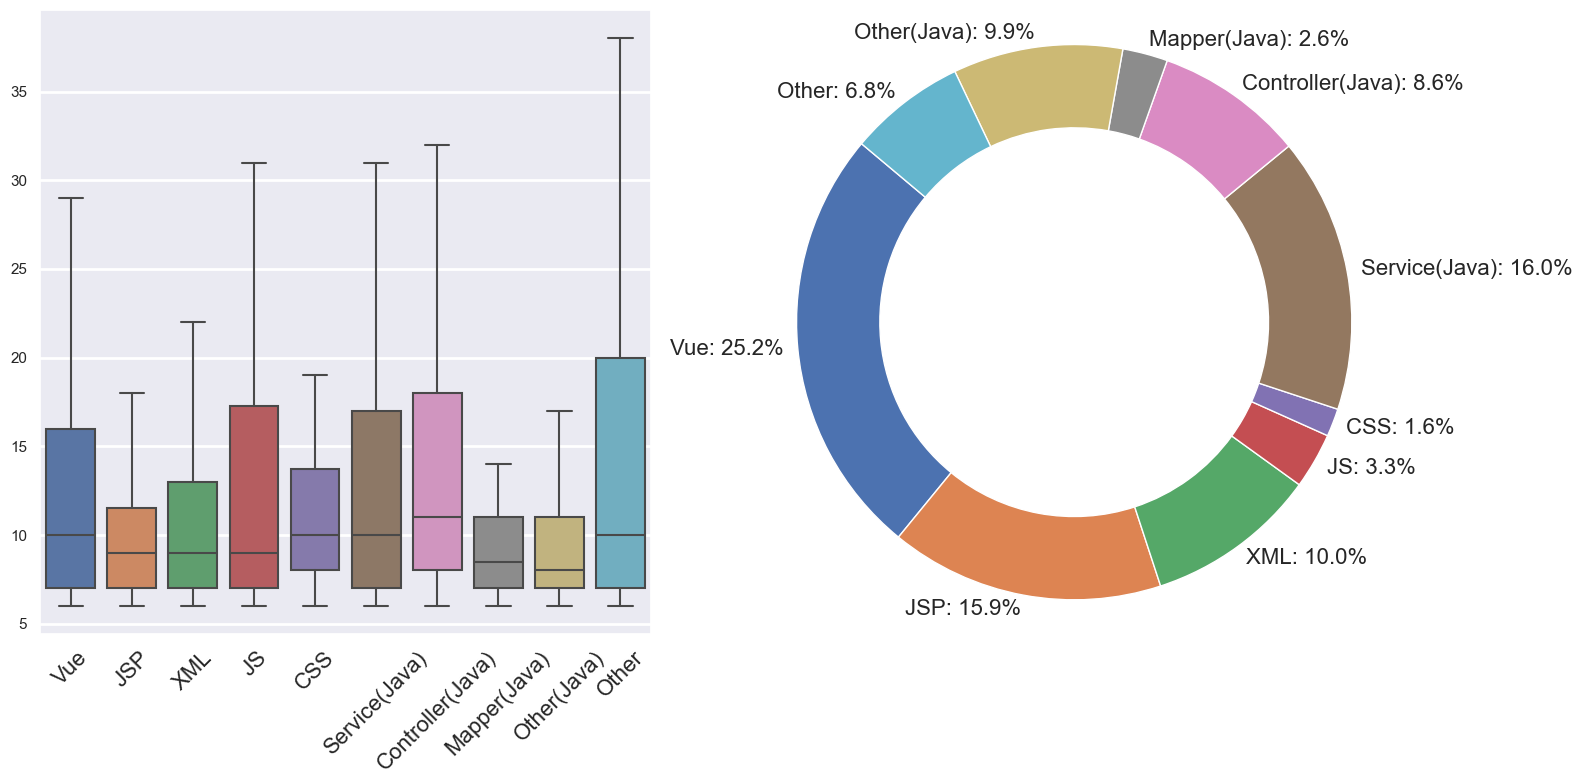

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style="darkgrid")

repetitive_modification_combined = pd.read_excel('processed_combined_repetitive_modification.xlsx')

specified_types = ['vue', 'jsp', 'xml', 'js', 'css', 'Service(Java)', 'Controller(Java)', 'Mapper(Java)', 'Other(Java)']
types_dict={}

repetitive_modification_combined['type'] = repetitive_modification_combined['type'].apply(
    lambda x: x if x in specified_types else 'Other'
)
specified_types = ['Vue', 'JSP', 'XML', 'JS', 'CSS', 'Service(Java)', 'Controller(Java)', 'Mapper(Java)', 'Other(Java)']


type_counts = repetitive_modification_combined['type'].value_counts(normalize=True)

type_counts = type_counts.reindex(specified_types + ['Other']).fillna(0)


plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='type', y='value', data=repetitive_modification_combined[repetitive_modification_combined['type'].isin(specified_types + ['Other'])], 
            order=specified_types + ['Other'], showfliers=False)
#plt.title('Boxplot of Value by Type')
plt.xticks(rotation=45, fontsize=16)
plt.xlabel('')  
plt.ylabel('')  

plt.grid(axis='y', linestyle='-', linewidth=2)

plt.subplot(1, 2, 2)
labels = [f'{label}: {count*100:.1f}%' for label, count in zip(type_counts.index, type_counts)]

plt.pie(type_counts, labels=labels, startangle=140, pctdistance=0.85, labeldistance=1.05, 
        wedgeprops=dict(width=0.3),  
        textprops={'fontsize': 16})  

#plt.title('Proportion of Each Type', fontsize=14)  
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()

plt.savefig('RQ0_analysis_plot0.pdf', format='pdf', bbox_inches='tight')

plt.show()

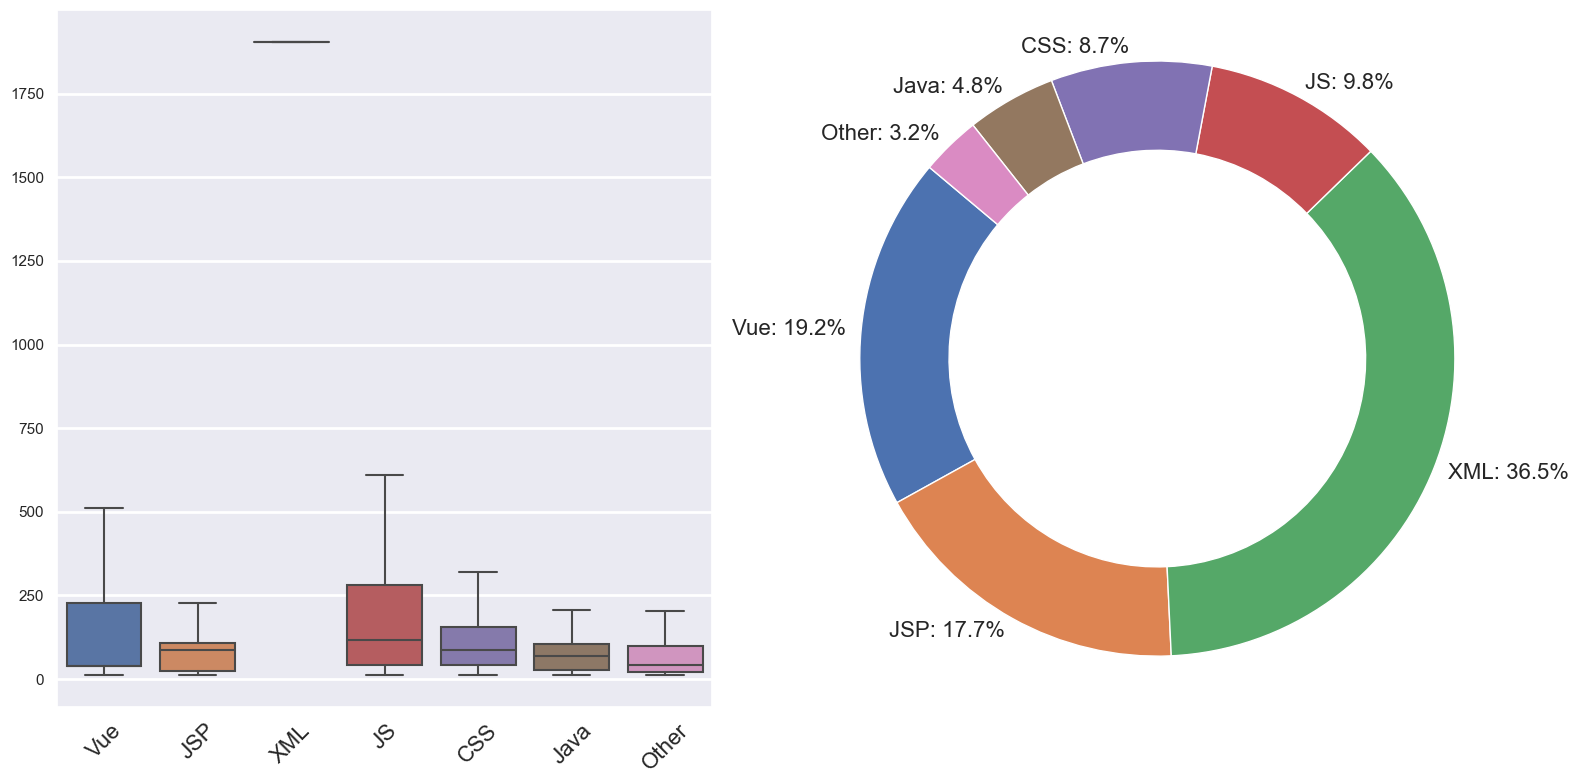

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 读取数据
similar_modification_combined = pd.read_excel('processed_combined_similar_modification.xlsx')
similar_modification_combined['average'] = similar_modification_combined['average'].astype(int)
similar_modification_combined = similar_modification_combined[similar_modification_combined['average'] > 10]

# 定义需要单独列出的类型

specified_types = ['vue', 'jsp', 'xml', 'js', 'css','Java']
types_dict={
    'vue':'Vue',
    'jsp':'JSP',
    'xml':'XML',
    'js':'JS',
    'css':'CSS',
    'Java':'Java'
}
# 预处理数据，将不在 specified_types 列表中的类型合并为 'Java'
java_types = ['Service(Java)', 'Controller(Java)', 'Mapper(Java)', 'Other(Java)']
similar_modification_combined['type'] = similar_modification_combined['type'].apply(
    lambda x: 'Java' if x in java_types else x
)
similar_modification_combined['type'] = similar_modification_combined['type'].apply(
    lambda x: types_dict[x] if x in specified_types else 'Other'
)
specified_types = ['Vue', 'JSP', 'XML', 'JS', 'CSS','Java']

type_counts = similar_modification_combined['type'].value_counts(normalize=True)

type_counts = type_counts.reindex(specified_types + ['Other']).fillna(0)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='type', y='average', data=similar_modification_combined, showfliers=False, order=specified_types + ['Other'])
#plt.title('Boxplot of Value by Type')
plt.xticks(rotation=45,fontsize=16)
plt.xlabel('')  
plt.ylabel('')  
plt.grid(axis='y', linestyle='-', linewidth=2)

plt.subplot(1, 2, 2)
labels = [f'{label}: {count*100:.1f}%' for label, count in zip(type_counts.index, type_counts)]

plt.pie(type_counts, labels=labels, startangle=140, pctdistance=0.4, labeldistance=1.05, 
        wedgeprops=dict(width=0.3),  
        textprops={'fontsize': 16})  


plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('RQ0_analysis_plot1.pdf', format='pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go


repetitive_modification_combined=pd.read_excel('processed_combined_repetitive_modification.xlsx')
repetitive_modification_combined = repetitive_modification_combined.dropna()

total_files = len(repetitive_modification_combined)

type_counts = repetitive_modification_combined['type'].value_counts()

labels = ['Total Files'] + type_counts.index.tolist()
values = [total_files] + type_counts.tolist()
source = [0] * len(type_counts)
target = list(range(1, len(type_counts) + 1))

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="blue"
    ),
    link=dict(
        source=source,
        target=target,
        value=values
    )
)])

fig.update_layout(title_text="File Type Distribution from Total Files", font_size=10)
fig.show()

In [ ]:

for type_name, count in type_counts.items():
    print(f"Type: {type_name}, Count: {count}")

Type: vue, Count: 403
Type: Service(Java), Count: 256
Type: jsp, Count: 255
Type: xml, Count: 160
Type: Other(Java), Count: 158
Type: Controller(Java), Count: 138
Type: js, Count: 52
Type: Mapper(Java), Count: 42
Type: css, Count: 26
Type: yaml, Count: 10
Type: tag, Count: 10
Type: json, Count: 8
Type: py, Count: 6
Type: scss, Count: 4
Type: properties, Count: 4
Type: html, Count: 3
Type: sql, Count: 2
Type: xls, Count: 1
Type: zip, Count: 1


In [ ]:
import pandas as pd
import plotly.graph_objects as go

similar_modification_combined=pd.read_excel('processed_combined_similar_modification.xlsx')
similar_modification_combined = similar_modification_combined.dropna()
similar_modification_combined=similar_modification_combined[similar_modification_combined['average']>10]

total_files = len(similar_modification_combined)

type_counts = similar_modification_combined['type'].value_counts()


labels = ['Total Files'] + type_counts.index.tolist()
values = [total_files] + type_counts.tolist()
source = [0] * len(type_counts)
target = list(range(1, len(type_counts) + 1))


fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="blue"
    ),
    link=dict(
        source=source,
        target=target,
        value=values
    )
)])

fig.update_layout(title_text="File Type Distribution from Total Files", font_size=10)
fig.show()

In [ ]:
import pandas as pd


result_df = pd.read_excel('type_counts_with_source.xlsx')

df1 = result_df.groupby(['Source', 'Main_type']).sum().reset_index()

df1['normalized_count'] = df1.groupby('Source')['Count'].transform(lambda x: x / x.sum())

print(df1)

                     Source               Main_type  Count  normalized_count
0  Repetitive Modifications                  Config     24          0.015595
1  Repetitive Modifications                    Java    594          0.385965
2  Repetitive Modifications                   Other      2          0.001300
3  Repetitive Modifications  Other Program Language      8          0.005198
4  Repetitive Modifications                     Web    911          0.591943
5     Similar Modifications                  Config    178          0.006754
6     Similar Modifications                    Java   1278          0.048495
7     Similar Modifications                   Other     44          0.001670
8     Similar Modifications  Other Program Language    192          0.007286
9     Similar Modifications                     Web  24661          0.935795


C:\Users\lenovo\AppData\Local\Temp\ipykernel_25264\2630853743.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
import pandas as pd

result_df = pd.read_excel('type_counts_with_source.xlsx')

df2 = result_df.groupby(['Main_type', 'Type']).sum().reset_index()

df2['normalized_count'] = df2.groupby('Main_type')['Count'].transform(lambda x: x / x.sum())

print(df2)

                 Main_type              Type  Count  normalized_count
0                   Config            config      2          0.009901
1                   Config         gitignore     38          0.188119
2                   Config                md     29          0.143564
3                   Config                po     60          0.297030
4                   Config             prefs     12          0.059406
5                   Config        properties     14          0.069307
6                   Config               tag     28          0.138614
7                   Config               txt      9          0.044554
8                   Config              yaml     10          0.049505
9                     Java  Controller(Java)    210          0.112179
10                    Java      Mapper(Java)    111          0.059295
11                    Java       Other(Java)   1057          0.564637
12                    Java     Service(Java)    494          0.263889
13                  

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25264\870440509.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
import pandas as pd
import plotly.graph_objects as go


result_df = pd.read_excel('type_counts_with_source.xlsx')

replace_dict = {'Web': 'Front-End', 'Java': 'Backend'}
result_df['Main_type'] = result_df['Main_type'].replace(replace_dict)

df1 = result_df.groupby(['Source', 'Main_type']).sum().reset_index()


df1['normalized_count'] = df1.groupby('Source')['Count'].transform(lambda x: x / x.sum())


df2 = result_df.groupby(['Main_type', 'Type']).sum().reset_index()


df2['normalized_count'] = df2.groupby('Main_type')['Count'].transform(lambda x: x / x.sum())


source_indices = []
target_indices = []
values = []
labels = []

for index, row in df1.iterrows():
    source = row['Source']
    main_type = row['Main_type']
    value = row['normalized_count']
    
    if source not in labels:
        labels.append(source)
    if main_type not in labels:
        labels.append(main_type)
    
    source_index = labels.index(source)
    target_index = labels.index(main_type)
    
    source_indices.append(source_index)
    target_indices.append(target_index)
    values.append(value)


fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
)])

fig.write_image("sankey_diagram.pdf", format="pdf", width=800, height=600)

fig.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23888\2467012078.py:10: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23888\2467012078.py:16: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

